In [1]:
!rm -rf /content/sample_data
!nvidia-smi

Thu Jan 28 07:27:58 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install pycocotools numpy==1.16.0 opencv-python tqdm tensorboard tensorboardX pyyaml webcolors matplotlib

In [2]:
!cp -r /content/drive/Shareddrives/ACloudDrive/Tianchi/2021广东工业智造创新大赛/tile_round1_testA_20201231.zip ./

In [3]:
!unzip tile_round1_testA_20201231.zip

Archive:  tile_round1_testA_20201231.zip
   creating: tile_round1_testA_20201231/
   creating: tile_round1_testA_20201231/testA_imgs/
  inflating: tile_round1_testA_20201231/testA_imgs/252_15_t2020113008554512_CAM1.jpg  
  inflating: tile_round1_testA_20201231/testA_imgs/241_136_t20201128130710258_CAM1.jpg  
  inflating: tile_round1_testA_20201231/testA_imgs/230_40_t20201126142123537_CAM3.jpg  
  inflating: tile_round1_testA_20201231/testA_imgs/230_193_t20201126151449533_CAM2.jpg  
  inflating: tile_round1_testA_20201231/testA_imgs/227_82_t20201126090904198_CAM2.jpg  
  inflating: tile_round1_testA_20201231/testA_imgs/241_31_t20201128123645225_CAM3.jpg  
  inflating: tile_round1_testA_20201231/testA_imgs/222_65_t2020112415461992_CAM1.jpg  
  inflating: tile_round1_testA_20201231/testA_imgs/254_71_t20201130152050177_CAM1.jpg  
  inflating: tile_round1_testA_20201231/testA_imgs/254_166_t20201130155742150_CAM1.jpg  
  inflating: tile_round1_testA_20201231/testA_imgs/241_7_t202011281230193

In [7]:
import os
import sys
if "projects" not in os.getcwd():
  !git clone --depth 1 https://github.com/zylo117/Yet-Another-EfficientDet-Pytorch
  os.chdir('Yet-Another-EfficientDet-Pytorch')
  sys.path.append('.')
else:
  !git pull

Cloning into 'Yet-Another-EfficientDet-Pytorch'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 47 (delta 3), reused 24 (delta 1), pack-reused 0
Unpacking objects: 100% (47/47), done.


In [8]:
!mkdir datasets
!mkdir datasets/test
!mkdir datasets/test/imgs
!mkdir datasets/test/annotations

In [9]:
!mv /content/tile_round1_testA_20201231/testA_imgs/*.jpg /content/Yet-Another-EfficientDet-Pytorch/datasets/test/imgs/

In [10]:
import os, sys, zipfile
import urllib.request
import shutil
import numpy as np
import skimage.io as io
import pandas
import matplotlib.pyplot as plt
import pylab
import json
import tqdm
from PIL import Image

In [ ]:
#generate test 
def test_from_dir(pic_path): 
    pics = os.listdir(pic_path) 
    meta = {} 
    images = [] 
    annotations =  [        {
            "area": 326.1354999999996,
            "iscrowd": 0,
            "image_id": 449,
            "bbox": [
                1654.76,
                2975,
                22,
                15
            ],
            "category_id": 5,
            "ignore": 0,
            "segmentation": [],

            "id": 516
        }
        ] 
    categories=[]
    for v in range(1,7):
        print(v)
        category = {}
        category['id'] = v
        category['name'] = str(v)
        category['supercategory'] = 'defect_name'
        categories.append(category)
    num = 0 
    for im in pics: 
        num += 1 
        img = os.path.join(pic_path,im)
        img = Image.open(img)
        images_anno = {} 
        images_anno['file_name'] = im
        images_anno['width'] = img.size[0]
        images_anno['height'] = img.size[1]
        images_anno['id'] = num
        images.append(images_anno) 
    meta['images'] = images
    meta['categories'] = categories 
    meta['annotations'] = annotations
    json.dump(meta,open('datasets/test/annotations/instances_imgs.json','w'),indent=4, ensure_ascii=False) 

In [ ]:
# 生成测试集标注（伪标注，无效的）
pic_path='datasets/test/imgs'
test_from_dir(pic_path)

1
2
3
4
5
6


In [ ]:
!python coco_eval.py -c 3 -p test  -w /content/drive/Shareddrives/ACloudDrive/Tianchi/2021广东工业智造创新大赛/logs/coco/efficientdet-d3_30_125502.pth \
  --nms_threshold 0.3

running coco-style evaluation on project test, weights /content/drive/Shareddrives/ACloudDrive/Tianchi/2021广东工业智造创新大赛/logs/coco/efficientdet-d3_30_125502.pth...
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
  0% 0/1762 [00:00<?, ?it/s]tcmalloc: large alloc 1179648000 bytes == 0xd5b36000 @  0x7fbc35abd1e7 0x7fbbe5eb241e 0x7fbbe5f02c2b 0x7fbbe5f02cc8 0x7fbbe5fbed19 0x7fbbe5fc1dec 0x7fbbe60e0ddf 0x7fbbe60e6f15 0x7fbbe60e8d9d 0x7fbbe60ea476 0x5a48ec 0x5a4fb8 0x7fbbe5fc9438 0x59c9f0 0x50ea2d 0x507be4 0x509900 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50cc96 0x507be4 0x509900 0x50a2fd 0x50beb4 0x507be4 0x50ad03 0x634e72 0x634f27
100% 1762/1762 [59:42<00:00,  2.03s/it]
Loading and preparing results...
DONE (t=0.29s)
creating index...
index created!
BBox
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.71s).
Accumulating evaluation results...
DONE (t=0.44s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 

In [ ]:
#将评估预测的结果按照我们生成的测试集伪标注格式保存
bbox = 'imgs_bbox_results.json'
test_path = 'datasets/test/annotations/instances_imgs.json'
sub_path = 'results.json'
def make_submittion(sub_path,bbox,test_path): 
    meta = {}
    with open(bbox) as f:
        bbox = json.load(f)
    with open(test_path) as f:
        test_ann = json.load(f)
    meta['images'] = test_ann['images']
    meta['annotations'] = bbox
    json.dump(meta,open(sub_path,'w'),indent=4) 
make_submittion(sub_path,bbox,test_path)

In [ ]:
results_path = 'results.json'
final_path = 'final_results.json'
def final_result(final_path, results_path): 
    with open(results_path,"r") as f:
        test_result = json.load(f)
    #获取图片id对应的图片名字字典
    imgs = test_result["images"]
    dict_img = {}
    for img in imgs:
        img_name = img["file_name"]
        img_id = img["id"]
        dict_img[str(img_id)] = img_name
    #print(dict_img["1"])
    #按照提交格式对应字段
    final_results = []
    annotations = test_result["annotations"]
    for ann in annotations:
        dict_ann = {}
        #设置图片name
        #将图片id对应为name
        ann_name_id = str(ann["image_id"])
        dict_ann["name"] = dict_img[ann_name_id]
        #设置类别category
        dict_ann["category"] = ann["category_id"]
        #设置bbox
        #之前预测的bbox中格式为【左上角横坐标x，左上角纵坐标y，框的高h，框的宽w】
        #提交格式要求的bbox格式为【左上角横坐标，左上角纵坐标，右下角横坐标，右下角纵坐标】
        bbox = ann["bbox"]
        #bbox = [bbox[0],bbox[1],bbox[0]+bbox[2],bbox[1]+bbox[3]]
        
        bbox_np = np.array(bbox)                    #列表转数组
        bbox_np_2f = np.round(bbox_np,2)                 #对数组中的元素保留两位小数
        bbox = list(bbox_np_2f)                     #数组转列表
        print(bbox)
        dict_ann["bbox"] = bbox
        #设置置信度score
        dict_ann["score"] = ann["score"]
        final_results.append(dict_ann)
    json.dump(final_results,open(final_path,'w'),indent=4) 
final_result(final_path, results_path)

In [ ]:
!cp -r final_results.json /content/drive/Shareddrives/ACloudDrive/Tianchi/2021广东工业智造创新大赛

In [ ]:
import os
import sys
os.chdir('Yet-Another-EfficientDet-Pytorch')

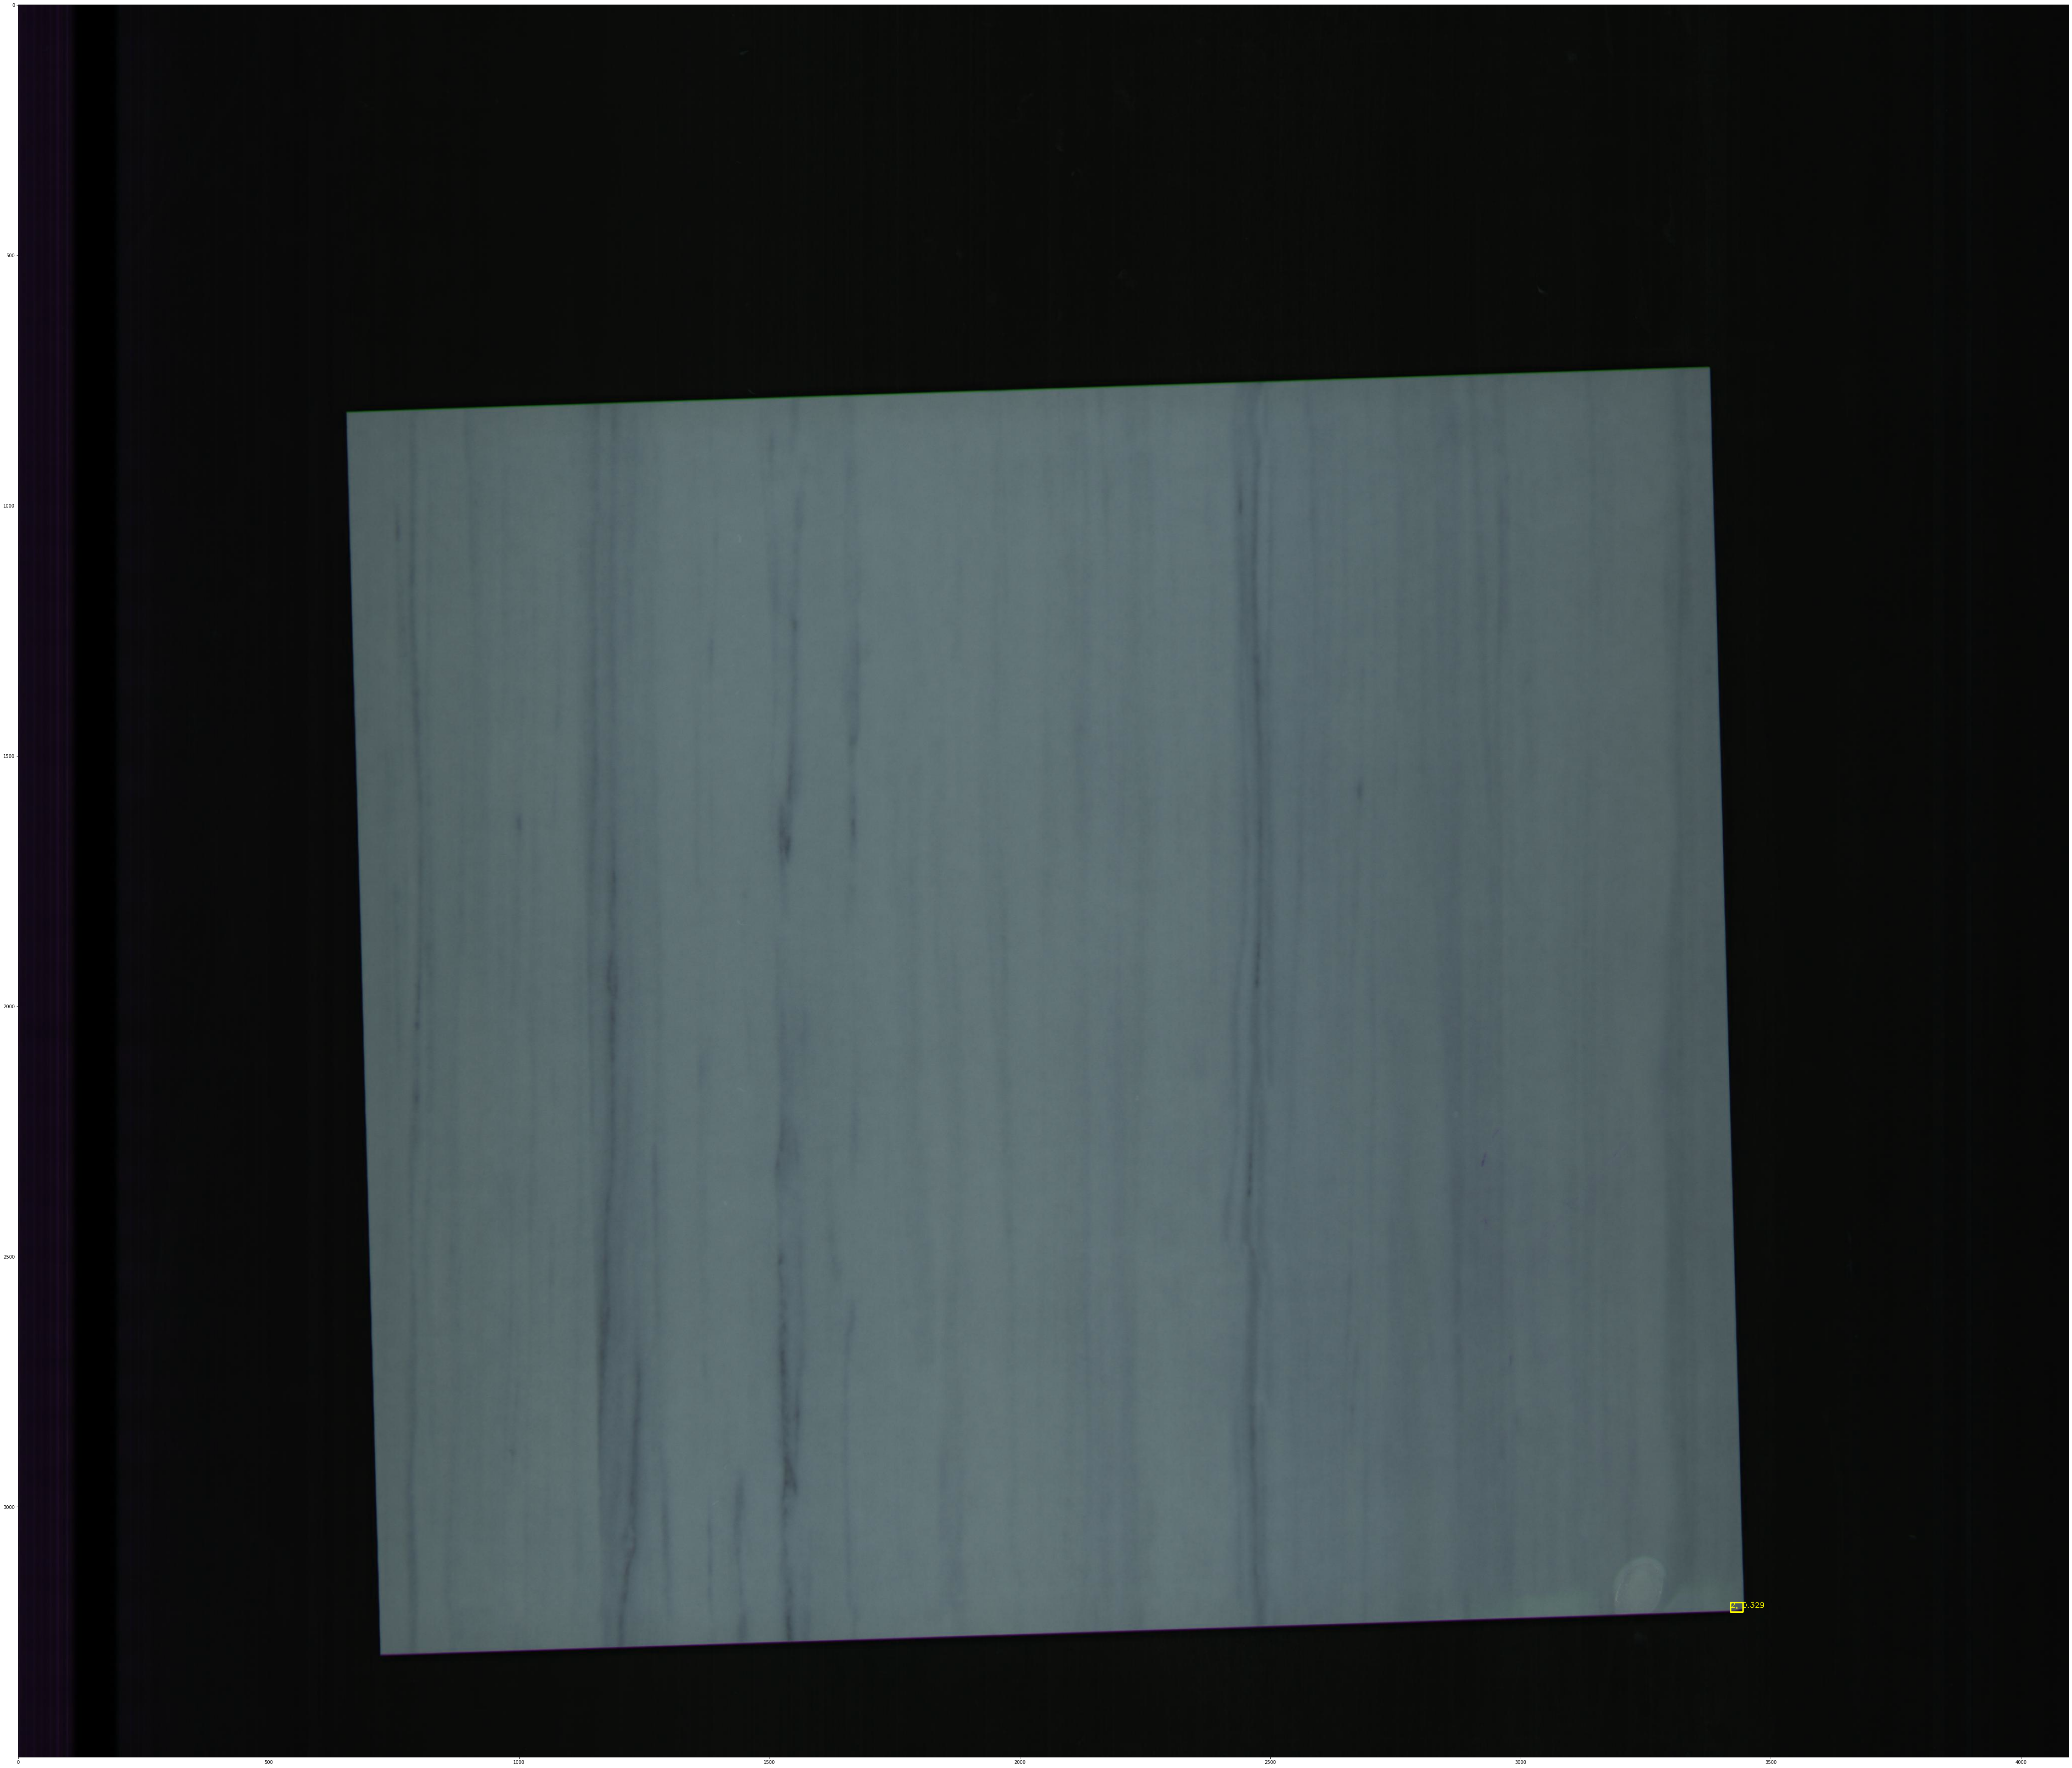

In [27]:
import torch
from torch.backends import cudnn

from backbone import EfficientDetBackbone
import cv2
import matplotlib.pyplot as plt
import numpy as np

from efficientdet.utils import BBoxTransform, ClipBoxes
from utils.utils import preprocess, invert_affine, postprocess

compound_coef = 3
force_input_size = 5120  # set None to use default size
img_path = '/content/Yet-Another-EfficientDet-Pytorch/datasets/test/imgs/233_18_t20201127101613600_CAM3.jpg'


threshold = 0.2
iou_threshold = 0.2

use_cuda = True
use_float16 = False
cudnn.fastest = True
cudnn.benchmark = True

obj_list=['1', '2', '3', '4', '5', '6']

# tf bilinear interpolation is different from any other's, just make do
input_sizes = [512, 640, 768, 4096, 1024, 1280, 1280, 1536]
input_size = input_sizes[compound_coef] if force_input_size is None else force_input_size
ori_imgs, framed_imgs, framed_metas = preprocess(img_path, max_size=input_size)

if use_cuda:
    x = torch.stack([torch.from_numpy(fi).cuda() for fi in framed_imgs], 0)
else:
    x = torch.stack([torch.from_numpy(fi) for fi in framed_imgs], 0)

x = x.to(torch.float32 if not use_float16 else torch.float16).permute(0, 3, 1, 2)

model = EfficientDetBackbone(compound_coef=compound_coef, num_classes=len(obj_list),

                             # replace this part with your project's anchor config
                             ratios=[(1.0, 1.0), (1.3, 0.8), (1.9, 0.5)],
                             scales=[2 ** 0, 2 ** (1.0 / 3.0), 2 ** (2.0 / 3.0)])

model.load_state_dict(torch.load(f'/content/drive/Shareddrives/ACloudDrive/Tianchi/2021广东工业智造创新大赛/logs/coco/efficientdet-d3_30_125502.pth'))
model.requires_grad_(False)
model.eval()

if use_cuda:
    model = model.cuda()
if use_float16:
    model = model.half()

with torch.no_grad():
    features, regression, classification, anchors = model(x)

    regressBoxes = BBoxTransform()
    clipBoxes = ClipBoxes()

    out = postprocess(x,
                      anchors, regression, classification,
                      regressBoxes, clipBoxes,
                      threshold, iou_threshold)

out = invert_affine(framed_metas, out)

for i in range(len(ori_imgs)):
    if len(out[i]['rois']) == 0:
        continue
    ori_imgs[i] = ori_imgs[i].copy()
    for j in range(len(out[i]['rois'])):
        (x1, y1, x2, y2) = out[i]['rois'][j].astype(np.int)
        cv2.rectangle(ori_imgs[i], (x1, y1), (x2, y2), (255, 255, 0), 2)
        obj = obj_list[out[i]['class_ids'][j]]
        score = float(out[i]['scores'][j])

        cv2.putText(ori_imgs[i], '{}, {:.3f}'.format(obj, score),
                    (x1, y1 + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    (255, 255, 0), 1)
        plt.figure(figsize=(60,60))
        plt.imshow(ori_imgs[i])